In [37]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns

## Read price data into Pandas Dataframe

It seems Pandas does not support rading data of .xls format, so I manually converted all the data files to .csv format and it works.

It seems all the price data from 2013 to 2019 have similar format, e.g. column names and headers. So First, I read the price data of 2013 into Pandas Dataframe and reformat the data from plain text to formats suitable for analysis. Then apply the same methods to price data of other years.

In [38]:
# Read in price data of 2013 into Pandas Dataframe
data_path_2013 = r'data\elspot-prices_2013_hourly_nok.csv'
df = pd.read_csv(data_path_2013, skiprows=[0, 1], header=0)
df.head()

,Unnamed: 0,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,Oslo,Kr.sand,Bergen,Molde,Tr.heim,Tromsø,EE,ELE,LV,LT
0,1/1/2013,00 - 01,"227,99","227,92","227,92","227,92","227,92","227,92","103,02","103,02","242,16","242,16","242,16","227,92","227,92","227,92","228,50","228,50",NaN,"179,31"
1,1/1/2013,01 - 02,"223,73","202,00","202,00","202,00","202,00","202,00","81,21","81,21","242,09","242,09","242,09","226,23","226,23","226,23","224,76","224,76",NaN,"173,43"
2,1/1/2013,02 - 03,"212,35","179,46","179,46","179,46","179,46","179,46","62,41","62,41","239,30","239,30","239,30","225,93","225,93","225,93","179,46","179,46",NaN,"175,71"
3,1/1/2013,03 - 04,"204,71","160,14","160,14","160,14","160,14","160,14","0,73","0,73","231,52","231,52","231,52","225,49","225,49","225,49","160,14","160,14",NaN,"175,12"
4,1/1/2013,04 - 05,"197,96","164,26","164,26","164,26","164,26","164,26","14,76","14,76","224,25","224,25","224,25","224,91","224,91","224,91","164,26","164,26",NaN,"170,79"


In [39]:
df = df.rename(columns={"Unnamed: 0": "Date", "Hours": "Hour"})

 Since we are going to forecast price for Oslo, I only read in price data for Oslo and ignore other areas.

In [40]:
df = df[["Date", "Hour", "Oslo"]].rename(columns={"Oslo": "Price"})

In [41]:
df.head()

,Date,Hour,Price
0,1/1/2013,00 - 01,"242,16"
1,1/1/2013,01 - 02,"242,09"
2,1/1/2013,02 - 03,"239,30"
3,1/1/2013,03 - 04,"231,52"
4,1/1/2013,04 - 05,"224,25"


Get an overview of the data.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 3 columns):
Date     8761 non-null object
Hour     8761 non-null object
Price    8760 non-null object
dtypes: object(3)
memory usage: 205.5+ KB


Now we sould 1) convert Price column to float and 2) convert Hour column to int type and 3) convert the Date column to Datetime type.

We can see that there is a missing value in Oslo price column. We will handle it later after price data for all years are loaded.

Now we convert the Price column from object to float.

In [43]:
def str2float(s):
    """Convert number in string s format to float. 
    Assign NaN value if ValueError raised.
    """
    try:
        number = float('.'.join(s.split(',')))
    except (ValueError, AttributeError):
        number = np.nan
    return number

In [44]:
df['Price'] = df['Price'].apply(str2float)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 3 columns):
Date     8761 non-null object
Hour     8761 non-null object
Price    8760 non-null float64
dtypes: float64(1), object(2)
memory usage: 205.5+ KB


Convert Hour column to int type.

In [46]:
df.Hour.unique()

array(['00\xa0-\xa001', '01\xa0-\xa002', '02\xa0-\xa003', '03\xa0-\xa004',
       '04\xa0-\xa005', '05\xa0-\xa006', '06\xa0-\xa007', '07\xa0-\xa008',
       '08\xa0-\xa009', '09\xa0-\xa010', '10\xa0-\xa011', '11\xa0-\xa012',
       '12\xa0-\xa013', '13\xa0-\xa014', '14\xa0-\xa015', '15\xa0-\xa016',
       '16\xa0-\xa017', '17\xa0-\xa018', '18\xa0-\xa019', '19\xa0-\xa020',
       '20\xa0-\xa021', '21\xa0-\xa022', '22\xa0-\xa023', '23\xa0-\xa000'],
      dtype=object)

The Hour column shows which hour of the day the electricity prices are about. Reformat it from object to int. The new 'Hour' starts from 0 and end at 23.

In [47]:
df.Hour = df.Hour.apply(lambda x: x[:2]).astype(int)
df.head()

,Date,Hour,Price
0,1/1/2013,0,242.16
1,1/1/2013,1,242.09
2,1/1/2013,2,239.30
3,1/1/2013,3,231.52
4,1/1/2013,4,224.25


convert the Date column to Datetime type.

In [48]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, dayfirst=True))

In [49]:
df.head()

,Date,Hour,Price
0,2013-01-01,0,242.16
1,2013-01-01,1,242.09
2,2013-01-01,2,239.30
3,2013-01-01,3,231.52
4,2013-01-01,4,224.25


Do some random check to see if the data is the same with the original data.

In [50]:
df.sample(5)

,Date,Hour,Price
1375,2013-02-27,7,324.69
2123,2013-03-30,11,353.70
2336,2013-04-08,8,664.23
6920,2013-10-16,8,315.14
3170,2013-05-13,2,242.88


Now the data format looks good and ready for analysis. We apply the same steps for the price data of 2014 - 2019, and concatenate them into a single Dataframe.

In [51]:
for year in range(2014, 2020):
    data_path = r'data\elspot-prices_{}_hourly_nok.csv'.format(year)
    df_ = pd.read_csv(data_path, skiprows=[0, 1], header=0)
    df_ = df_.rename(columns={"Unnamed: 0": "Date", "Hours": "Hour"})
    df_ = df_[["Date", "Hour", "Oslo"]].rename(columns={"Oslo": "Price"})
    df_['Price'] = df_['Price'].apply(str2float)
    df_['Hour'] = df_['Hour'].apply(lambda x: x[:2]).astype(int)
    df_['Date'] = df_['Date'].apply(lambda x: pd.to_datetime(x, dayfirst=True))
    df = pd.concat([df, df_], ignore_index=True)

Add the Hour information to the Date column and rename the resulting column to Time.

In [52]:
ds_time = df.apply(lambda row: row.Date.replace(hour=row.Hour),
                   axis=1).rename('Time')
df = pd.concat([ds_time, df], axis=1).drop(columns=['Date', 'Hour'])

In [53]:
df.head()

,Time,Price
0,2013-01-01 00:00:00,242.16
1,2013-01-01 01:00:00,242.09
2,2013-01-01 02:00:00,239.30
3,2013-01-01 03:00:00,231.52
4,2013-01-01 04:00:00,224.25


Again, do some random check againt data in the original data files to see if the data is the same with the original data.

In [54]:
df.sample(5)

,Time,Price
4618,2013-07-12 10:00:00,267.35
49348,2018-08-18 23:00:00,422.11
54072,2019-03-03 18:00:00,418.77
56439,2019-06-10 09:00:00,303.19
40365,2017-08-09 17:00:00,245.62


After check the random samples are the same with the original data. Now save the Dataframe for future use.

In [55]:
# df.to_json('elspot_hourly_price_oslo_13-19_dt.json')

## Data cleaning: missing values, duplicates, and outliers

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61039 entries, 0 to 61038
Data columns (total 2 columns):
Time     61039 non-null datetime64[ns]
Price    61032 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 953.9 KB


We can see there are 7 missing values in the Price column. Have a look at the corresponding rows.

In [57]:
df[df.Price.isnull()]

,Time,Price
2138,2013-03-31 02:00:00,NaN
10875,2014-03-30 02:00:00,NaN
19612,2015-03-29 02:00:00,NaN
28349,2016-03-27 02:00:00,NaN
37086,2017-03-26 02:00:00,NaN
45823,2018-03-25 02:00:00,NaN
54728,2019-03-31 02:00:00,NaN


It is interesting that the missing values are about the same hour, i.e. 2 o'clock, on the end of March of every year. It does not look like randomly missing. Now let's look at the data of the periods around these timestamps, to see if we can find why they are missing. For example, are they duplicated timestamps or not.

In [58]:
nan_idx = df[df.Price.isnull()].index
nan_periods = []
for i in nan_idx:
    nan_periods += range(i - 1, i + 2)

df.iloc[nan_periods]

,Time,Price
2137,2013-03-31 01:00:00,357.66
2138,2013-03-31 02:00:00,NaN
2139,2013-03-31 03:00:00,356.84
10874,2014-03-30 01:00:00,214.19
10875,2014-03-30 02:00:00,NaN
10876,2014-03-30 03:00:00,202.03
19611,2015-03-29 01:00:00,194.43
19612,2015-03-29 02:00:00,NaN
19613,2015-03-29 03:00:00,190.69
28348,2016-03-27 01:00:00,146.67


They are not dupolicates, they are simoly missing. We can see that the prices before and after the time with missing prices are quite colse. So it is reasonable to estimate the missing values with the prices around them. Here I use linear interpolation which estimiates the missing value by a straight line between the values before and after the missing value.

In [64]:
df['Price'] = df['Price'].interpolate(method='linear')

C:\Users\Mao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61032 entries, 0 to 61038
Data columns (total 2 columns):
Time     61032 non-null datetime64[ns]
Price    61032 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


Check if there is duplicates in the timestamps.

In [60]:
df[df.Time.duplicated(keep=False)]

,Time,Price
7178,2013-10-27 02:00:00,266.93
7179,2013-10-27 02:00:00,266.93
15915,2014-10-26 02:00:00,132.52
15916,2014-10-26 02:00:00,121.67
24652,2015-10-25 02:00:00,203.04
24653,2015-10-25 02:00:00,203.04
33557,2016-10-30 02:00:00,290.05
33558,2016-10-30 02:00:00,289.60
42294,2017-10-29 02:00:00,217.96
42295,2017-10-29 02:00:00,204.80


We can see that there are a few duplicates. Again, it is very interesting that all the duplicates happens at 2 o'clock but at the end of October each year. The duplicated prices do not have the same values but very close. It's reasonable to remove either the first or second. Here simply remove the second.

In [61]:
df = df.drop_duplicates(subset=['Time'], keep='first')

In [63]:
df[df.Time.duplicated(keep=False)]

,Time,Price


Now there is no duplicates. We also need to check if there is missing timestamps (e.g. hour or day) in the data. We can do this by calculating the delta - the difference beteewn any two ajacent timestamps - to see if all the deltas are one hour.

In [66]:
time_stamps = list(df.Time)
time_diffs = [timedelta(hours=1)
              ] + [i - j for i, j in zip(time_stamps[1:], time_stamps[:-1])]
abnormal = [i for i, x in enumerate(time_diffs) if x != timedelta(hours=1)]

In [67]:
abnormal

[]

It is nice to see there is no missing timestamps.

## Data analysis

Convert dataframe to series and set the time as index.

In [68]:
ds_oslo = df.set_index('Time')['Price']
ds_oslo.head()

Time
2013-01-01 00:00:00    242.16
2013-01-01 01:00:00    242.09
2013-01-01 02:00:00    239.30
2013-01-01 03:00:00    231.52
2013-01-01 04:00:00    224.25
Name: Price, dtype: float64

Take a look at some statistics of the power price in Oslo from 2013 - 2019.

In [72]:
ds_oslo.describe()

count    61032.000000
mean       287.869052
std        109.187685
min          4.930000
25%        221.780000
50%        270.590000
75%        344.565000
max       2454.310000
Name: Price, dtype: float64

It is quite superising that the power price can be as low as 4.93 NOK and as high as 2454.31 NOK. Let's see there dates.

In [83]:
ds_oslo.idxmax(), ds_oslo[ds_oslo.idxmax()]

(Timestamp('2018-03-01 08:00:00'), 2454.31)

In [82]:
ds_oslo.idxmin(), ds_oslo[ds_oslo.idxmin()]

(Timestamp('2014-10-27 02:00:00'), 4.93)

Let's get an overview of the price in these years with a figure.

In [85]:
# group the data by year (freq='A' means yearly frequency)
groups = ds_oslo.groupby(pd.Grouper(freq='A'))

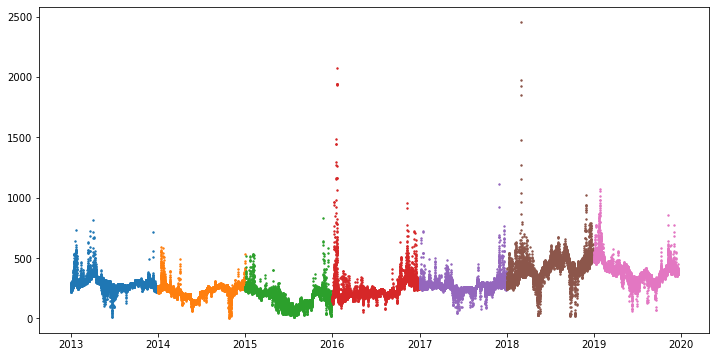

In [108]:
# distinguish years in plot
fig = plt.figure(figsize=(12, 6))
for i, (name, group) in enumerate(groups):
    plt.scatter(x=group.index, y=group, s=2)

It shows that there are a few high prices in 2016 and 2018 compares to other years. Generally, in the same year, the power price in winter time is higher than that in summer time.

## Forecast daily power price based on historical price data

In [95]:
# resample the data by day and get the daily mean
ds_oslo_daily = ds_oslo.resample('D').mean()

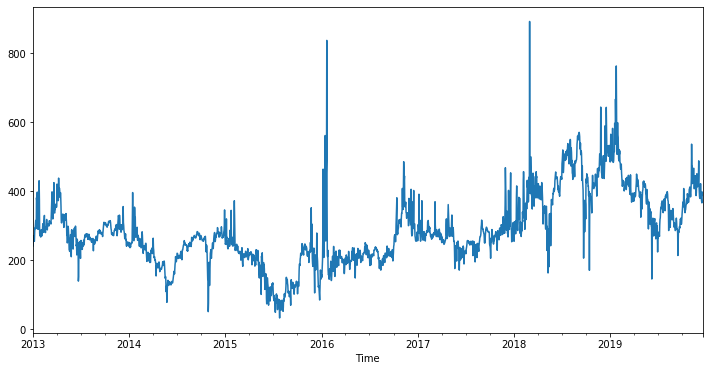

In [96]:
fig = plt.figure(figsize=(12, 6))
ds_oslo_daily.plot()

We can see that the daily mean price varies from day to day and there is no clear trend or strong seasonality.

In [109]:
# ds_oslo_daily[(ds_oslo_daily.index.week == 37) & (ds_oslo_daily.index.year == 2013)].plot()

Let's check the autocorrelation between lagged values of the prices, to see if there is any linear relationship between prices and their previous prices.

In [110]:
# this method supports different lags
from statsmodels.graphics.tsaplots import plot_acf

Let's see the autocorrelation between prices and their previous 100 prices.

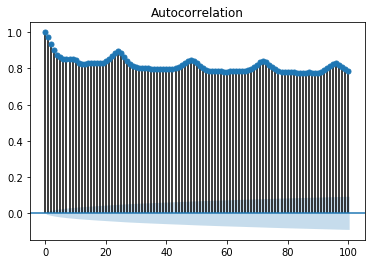

In [115]:
plot_acf(ds_oslo.values, lags=100)
plt.show()

It shows the autocrrelation is quite strong, especially for the first 20 lags. That means we can forecast a price using a number of its previous prices.

The Auto Regressive Integrated Moving Average (ARIMA) is a classic statistic model that can forecast forecast future values based on its past values. And it is suitable for non-seasonal time series data. So here we use ARIMA to forecast the power price using its previous values.

First of all, split the data into train and test data. Since I am going to forecast prices for two period of time, i.e. from 16.5 to 20.5 and seven days in week 50 in 2019. I will build a model for each period and thus split the data once for building each model.

For forecasting prices from 16.5 to 20.5, I use data in 2013 - 2017 for training and hold out the data from 2018-01-01 to 2019-05-15 for test. That is approximately 80%/20% split.

For forecasting prices for week 50 in 2019 (2019-12-09 to 2019-12-15), I use data in 2013 - 2017 for training and hold out the data from 2018-01-01 to 2019-12-08 for test. That is approximately 70%/30% split.

In [129]:
oslo_daily_train = ds_oslo_daily[:pd.to_datetime(datetime(2017, 12, 31))]
oslo_daily_test = ds_oslo_daily[pd.to_datetime(datetime(2018, 1, 1)):]

In [116]:
from statsmodels.tsa.arima_model import ARIMA

ARIMA has three parameters ('p', 'd', 'q') to set, 'p' is the number of lags of the historic values to be used. 'd' is the minimum number of differencing needed to make the time series data stationary. And 'q' is the number of lagged forecast errors to be used. Here I use a simple parameter setting to see how the forecasting result looks like.

In [153]:
ARIMA_model = ARIMA(oslo_daily_train.values, order=(1, 1, 1))
ARIMA_model = ARIMA_model.fit()
# print(ARIMA_model.summary().tables[1])

In [160]:
forecast_results = ARIMA_model.forecast(15)[0]

In [161]:
forecast_results = pd.Series(forecast_results, index=oslo_daily_test.index[0:15])

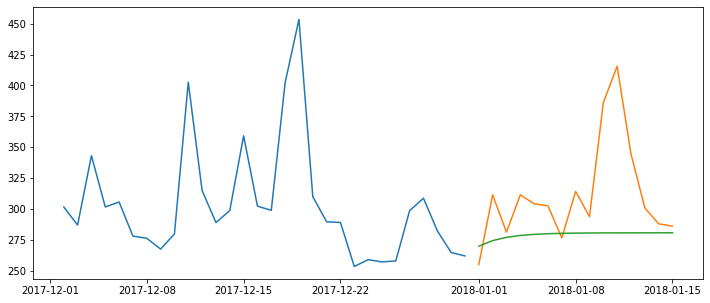

In [167]:
plt.figure(figsize=(12,5))
plt.plot(oslo_daily_train[-30:], label='train')
plt.plot(oslo_daily_test[0:15], label='actual')
plt.plot(forecast_results, label='forecast')

It seems the results of multi step forecasting of ARIMA is not very good. Now we evaluation the model using the Mean Absolute Percentage Error (MAPE) metric. It gives percentage error between 0 and 1. So it is easier to judge how good is the forecast compared to other matrics like Root Mean Squared Error (RMSE).

In [170]:
mape_score = np.mean(
    np.abs(forecast_results.values - oslo_daily_test[0:15].values) /
    np.abs(oslo_daily_test[0:15].values))

In [171]:
mape_score

0.10075735120814407

Around 10% MAPE implies the model is about 90% accurate in forecasting prices for the next 15 days.

## Forecasting power price based on historical price and hydro reservoir data

First of all, read in the hydro reservoir data and clean up the formats.

In [213]:
df_hydro = pd.read_csv(r'data\hydro-reservoir_2013_weekly.csv', skiprows=[0, 1])
df_hydro.head()

,Unnamed: 0,NO,SE,FI
0,02 - 13,54099,20521,3793
1,03 - 13,51059,19122,3621
2,04 - 13,48117,17706,3471
3,05 - 13,45906,16650,3393
4,06 - 13,43302,15356,3202


In [214]:
df_hydro = df_hydro.rename(columns={'Unnamed: 0': 'Week_Year'}
                          )[['Week_Year', 'NO', 'SE']]

In [215]:
df_hydro.head()

,Week_Year,NO,SE
0,02 - 13,54099,20521
1,03 - 13,51059,19122
2,04 - 13,48117,17706
3,05 - 13,45906,16650
4,06 - 13,43302,15356


In [216]:
df_hydro.Week_Year.unique()

array(['02\xa0-\xa013', '03\xa0-\xa013', '04\xa0-\xa013', '05\xa0-\xa013',
       '06\xa0-\xa013', '07\xa0-\xa013', '08\xa0-\xa013', '09\xa0-\xa013',
       '10\xa0-\xa013', '11\xa0-\xa013', '12\xa0-\xa013', '13\xa0-\xa013',
       '14\xa0-\xa013', '15\xa0-\xa013', '16\xa0-\xa013', '17\xa0-\xa013',
       '18\xa0-\xa013', '19\xa0-\xa013', '20\xa0-\xa013', '21\xa0-\xa013',
       '22\xa0-\xa013', '23\xa0-\xa013', '24\xa0-\xa013', '25\xa0-\xa013',
       '26\xa0-\xa013', '27\xa0-\xa013', '28\xa0-\xa013', '29\xa0-\xa013',
       '30\xa0-\xa013', '31\xa0-\xa013', '32\xa0-\xa013', '33\xa0-\xa013',
       '34\xa0-\xa013', '35\xa0-\xa013', '36\xa0-\xa013', '37\xa0-\xa013',
       '38\xa0-\xa013', '39\xa0-\xa013', '40\xa0-\xa013', '41\xa0-\xa013',
       '42\xa0-\xa013', '43\xa0-\xa013', '44\xa0-\xa013', '45\xa0-\xa013',
       '46\xa0-\xa013', '47\xa0-\xa013', '48\xa0-\xa013', '49\xa0-\xa013',
       '50\xa0-\xa013', '51\xa0-\xa013', '52\xa0-\xa013', '01\xa0-\xa014'],
      dtype=object)

In [217]:
df_hydro.Week_Year = df_hydro.Week_Year.apply(lambda x: x[:2]+' - '+x[-2:])

In [218]:
df_hydro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
Week_Year    52 non-null object
NO           52 non-null int64
SE           52 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


Now do the same cleaning steps to the hydro data from 2014 to 2019.

In [219]:
for year in range(2014, 2020):
    df_hydro_ = pd.read_csv(r'data\hydro-reservoir_{}_weekly.csv'.format(year), skiprows=[0, 1])
    df_hydro_ = df_hydro_.rename(columns={'Unnamed: 0': 'Week_Year'}
                          )[['Week_Year', 'NO', 'SE']]
    df_hydro_.Week_Year = df_hydro_.Week_Year.apply(lambda x: x[:2]+' - '+x[-2:])
    df_hydro = pd.concat([df_hydro, df_hydro_], ignore_index=True)

In [220]:
df_hydro[df_hydro.NO.isnull()]

,Week_Year,NO,SE
258,52 - 18,NaN,NaN
259,01 - 19,NaN,NaN
310,52 - 18,NaN,NaN
311,01 - 19,NaN,NaN
361,50 - 19,NaN,NaN
362,51 - 19,NaN,NaN


In [224]:
df_hydro = df_hydro.drop(362)

In [222]:
df_hydro.at[361, 'NO'] = 58361
df_hydro.at[361, 'SE'] = 21817

In [223]:
df_hydro[df_hydro.NO.isnull()]

,Week_Year,NO,SE
258,52 - 18,NaN,NaN
259,01 - 19,NaN,NaN
310,52 - 18,NaN,NaN
311,01 - 19,NaN,NaN
362,51 - 19,NaN,NaN


In [203]:
df_hydro['NO'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer